<a href="https://colab.research.google.com/github/yushendye/AerialInspection/blob/main/PP_YOLO_Imple_1_July.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 108.9MB 73kB/s 


In [ ]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 CPU.
PaddlePaddle works well on 2 CPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [ ]:
!python -c "import paddle; print(paddle.__version__)"

2.1.1


In [ ]:
!pip install paddledet==2.1.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 419kB 197kB/s 
     |████████████████████████████████| 1.5MB 2.3MB/s 
     |████████████████████████████████| 2.7MB 10.4MB/s 
     |████████████████████████████████| 153kB 16.5MB/s 
     |████████████████████████████████| 204kB 16.6MB/s 
     |████████████████████████████████| 194kB 19.4MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 2.0MB 6.2MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 1.9MB 17.7MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
     |████████████████████████████████| 7.2MB 9.3MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 348kB 20.2MB/s 
  Created wheel for terminaltables: filename=terminaltables-3

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleDetection.git

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 14312, done.
remote: Counting objects: 100% (1258/1258), done.
remote: Compressing objects: 100% (646/646), done.
remote: Total 14312 (delta 752), reused 993 (delta 611), pack-reused 13054
Receiving objects: 100% (14312/14312), 133.61 MiB | 25.31 MiB/s, done.
Resolving deltas: 100% (10089/10089), done.


In [ ]:
%cd PaddleDetection/

/content/PaddleDetection


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating paddledet.egg-info
writing paddledet.egg-info/PKG-INFO
writing dependency_links to paddledet.egg-info/dependency_links.txt
writing requirements to paddledet.egg-info/requires.txt
writing top-level names to paddledet.egg-info/top_level.txt
writing manifest file 'paddledet.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'paddledet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ppdet
copying ppdet/optimizer.py -> build/lib/ppdet
copying ppdet/__init__.py -> build/lib/ppdet
creating build/lib/ppdet/model_zoo
copying ppdet/model_zoo/model_zoo.py -> build/lib/ppdet/model_zoo
copying ppdet/model_zoo/__init__.py -> build/lib/ppdet/model_zoo
creating build/lib/ppdet/metrics
copying ppdet/metrics/metrics.py -> build/lib/ppdet/metrics
copying ppdet/metrics/coco_utils.py -> build/lib/ppdet/metr

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python ppdet/modeling/tests/test_architectures.py

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
.....
----------------------------------------------------------------------
Ran 5 tests in 6.914s

OK


In [ ]:
!export CUDA_VISIBLE_DEVICES=0
!python tools/infer.py -c configs/ppyolo/ppyolo_r50vd_dcn_1x_coco.yml -o use_gpu=false weights=https://paddledet.bj.bcebos.com/models/ppyolo_r50vd_dcn_1x_coco.pdparams --infer_img=demo/000000014439.jpg

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
[07/01 04:04:30] ppdet.utils.checkpoint INFO: Finish loading model weights: /root/.cache/paddle/weights/ppyolo_r50vd_dcn_1x_coco.pdparams

import numpy as np
from paddle.io import DataLoader, Dataset

class RandomDataset(Dataset):
    def __getitem__(self, idx):
        data = np.random.random((2, 3)).astype('float32')

        return data

    def __len__(self):
        return 10

dataset = RandomDataset()
loader = DataLoader(dataset, batch_size=1)
data = next(loader())

In Paddle <= 2.0, data is in format 

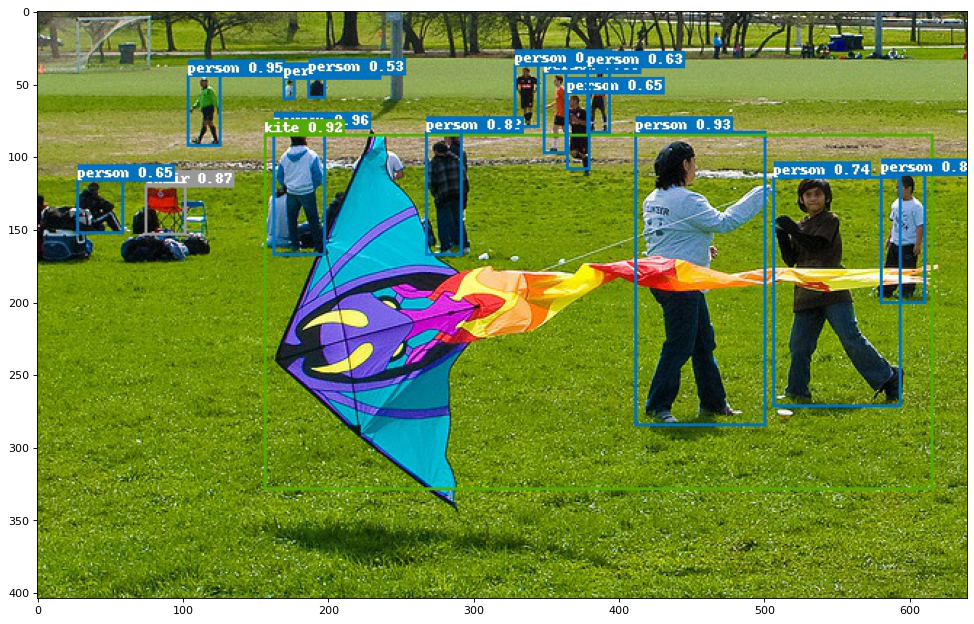

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=80)
plt.imshow(plt.imread('/content/PaddleDetection/output/000000014439.jpg'))

In [ ]:
!wget https://www.uber-assets.com/image/upload/f_auto,q_auto:eco,c_fill,w_956,h_537/v1570145181/assets/00/8bb6a1-6821-486a-9b2c-ae9b55cb0f1e/original/JFK-03-ai_4x5.jpg

--2021-07-01 04:13:04--  https://www.uber-assets.com/image/upload/f_auto,q_auto:eco,c_fill,w_956,h_537/v1570145181/assets/00/8bb6a1-6821-486a-9b2c-ae9b55cb0f1e/original/JFK-03-ai_4x5.jpg
Resolving www.uber-assets.com (www.uber-assets.com)... 151.101.2.104, 151.101.66.104, 151.101.130.104, ...
Connecting to www.uber-assets.com (www.uber-assets.com)|151.101.2.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94934 (93K) [image/jpeg]
Saving to: ‘JFK-03-ai_4x5.jpg’

JFK-03-ai_4x5.jpg   100%[===================>]  92.71K   393KB/s    in 0.2s    

2021-07-01 04:13:06 (393 KB/s) - ‘JFK-03-ai_4x5.jpg’ saved [94934/94934]



In [ ]:
!python tools/infer.py -c configs/ppyolo/ppyolo_r50vd_dcn_1x_coco.yml -o use_gpu=false weights=https://paddledet.bj.bcebos.com/models/ppyolo_r50vd_dcn_1x_coco.pdparams --infer_img=/content/PaddleDetection/airport.jpg

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
[07/01 04:17:31] ppdet.utils.checkpoint INFO: Finish loading model weights: /root/.cache/paddle/weights/ppyolo_r50vd_dcn_1x_coco.pdparams

import numpy as np
from paddle.io import DataLoader, Dataset

class RandomDataset(Dataset):
    def __getitem__(self, idx):
        data = np.random.random((2, 3)).astype('float32')

        return data

    def __len__(self):
        return 10

dataset = RandomDataset()
loader = DataLoader(dataset, batch_size=1)
data = next(loader())

In Paddle <= 2.0, data is in format 

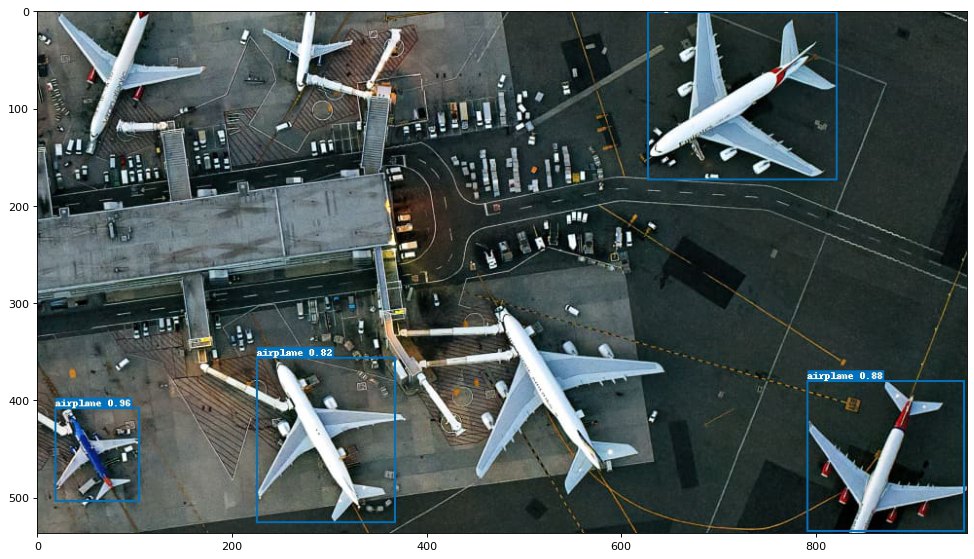

In [ ]:
figure(figsize=(15, 15), dpi=80)
plt.imshow(plt.imread('/content/PaddleDetection/output/airport.jpg'))